In [ ]:
!pip install d2l

In [1]:
%matplotlib inline
import random
import tensorflow as tf
from d2l import tensorflow as d2l

In [2]:
def synthetic_data(w, b, num_examples):
    """Generate y = Xw + b + noise."""
    X = tf.zeros((num_examples, w.shape[0]))
    X += tf.random.normal(shape=X.shape)
    y = tf.matmul(X, tf.reshape(w, (-1, 1))) + b
    y += tf.random.normal(shape=y.shape, stddev=0.01)
    y = tf.reshape(y, (-1, 1))
    return X, y

true_w = tf.constant([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [3]:
print('features:', features[0],'\nlabel:', labels[0])

features: tf.Tensor([ 0.24536575 -0.9485027 ], shape=(2,), dtype=float32) 
label: tf.Tensor([7.9148064], shape=(1,), dtype=float32)


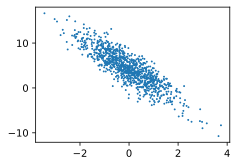

In [4]:
d2l.set_figsize()
# The semicolon is for displaying the plot only
d2l.plt.scatter(features[:, (1)].numpy(), labels.numpy(), 1);

In [5]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = tf.constant(indices[i: min(i + batch_size, num_examples)])
        yield tf.gather(features, j), tf.gather(labels, j)

In [6]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tf.Tensor(
[[-0.14362068 -0.04781902]
 [-0.9548451  -2.7908175 ]
 [-0.37809753 -1.2227129 ]
 [ 0.95104176  1.0762528 ]
 [ 0.09128428 -1.8021921 ]
 [-1.5801274  -0.4935338 ]
 [-1.1347111   1.2622844 ]
 [-0.4024131  -0.1217723 ]
 [-0.74103564 -1.2806914 ]
 [-0.18831366  0.8973731 ]], shape=(10, 2), dtype=float32) 
 tf.Tensor(
[[ 4.075512  ]
 [11.7767    ]
 [ 7.600259  ]
 [ 2.4460104 ]
 [10.512737  ]
 [ 2.7152324 ]
 [-2.374178  ]
 [ 3.8161502 ]
 [ 7.0822706 ]
 [ 0.76363415]], shape=(10, 1), dtype=float32)


In [7]:
w = tf.Variable(tf.random.normal(shape=(2, 1), mean=0, stddev=0.01),
                trainable=True)
b = tf.Variable(tf.zeros(1), trainable=True)

In [8]:
def linreg(X, w, b):  #@save"""The linear regression model."""
    return tf.matmul(X, w) + b

In [9]:
def squared_loss(y_hat, y):  #@save"""Squared loss."""
    return (y_hat - tf.reshape(y, y_hat.shape)) ** 2 / 2

In [10]:
def sgd(params, grads, lr, batch_size):  #@save"""Minibatch stochastic gradient descent."""
    for param, grad in zip(params, grads):
        param.assign_sub(lr*grad/batch_size)

In [11]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        with tf.GradientTape() as g:
            l = loss(net(X, w, b), y)  # Minibatch loss in `X` and `y`
        # Compute gradient on l with respect to [`w`, `b`]
        dw, db = g.gradient(l, [w, b])
        # Update parameters using their gradient
        sgd([w, b], [dw, db], lr, batch_size)
    train_l = loss(net(features, w, b), labels)
    print(f'epoch {epoch + 1}, loss {float(tf.reduce_mean(train_l)):f}')

epoch 1, loss 0.028355
epoch 2, loss 0.000098
epoch 3, loss 0.000054


In [12]:
print(f'error in estimating w: {true_w - tf.reshape(w, true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: [0.00013244 0.00033331]
error in estimating b: [0.00036526]
